<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>





## 18 Poisson/Laplace equation

So far we've focused on the **heat equation** (parabolic PDE). Let's explore other fundamental PDE types:

### Three Main Categories:

1. **Parabolic PDEs** (Heat/Diffusion equation):
   $$\frac{\partial u}{\partial t} = \alpha \nabla^2 u$$
   - **Time-dependent**
   - **Initial value problems**
   - **Dissipative** (energy decreases over time)

2. **Elliptic PDEs** (Poisson/Laplace equation, Electrostatic potential):
   $$\nabla^2 u = f(x,y) \quad \text{(Poisson)}$$
   $$\nabla^2 u = 0 \quad \text{(Laplace)}$$
   - **Time-independent**
   - **Boundary value problems**
   - **Steady-state solutions**

3. **Hyperbolic PDEs** (Wave equation: sound, electromagentic waves)
   $$\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u$$
   - **Time-dependent with second derivative**
   - **Initial + boundary conditions**
   - **Conservative** (energy preserved)

## 18. Poisson Equation (Elliptic PDE)

The **Poisson equation** is a fundamental elliptic PDE:
$$\nabla^2 u = f(x,y)$$

In 2D: $$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f(x,y)$$

**Key characteristics:**
- **No time dependence** - steady-state problem
- **Boundary value problem** - need conditions on domain boundary
- **Global coupling** - solution at each point depends on entire domain

**Physical interpretation:**
- **f(x,y) > 0**: Heat sources (e.g., resistive heating)
- **f(x,y) < 0**: Heat sinks (e.g., cooling)
- **f(x,y) = 0**: Laplace equation (equilibrium with no sources)

**Boundary conditions:**
- **Dirichlet**: $u = g(x,y)$ on boundary (fixed temperature)
- **Neumann**: $\frac{\partial u}{\partial n} = h(x,y)$ on boundary (heat flux)
- **Mixed**: Combination of both types

**Finite difference discretization:**
$$\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{(\Delta y)^2} = f_{i,j}$$

For square grids ($\Delta x = \Delta y = h$):
$$u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j} = h^2 f_{i,j}$$



## 18.1 Solving the Poisson Equation

The discretized Poisson equation creates a **large sparse linear system**:
$$\mathbf{A}\mathbf{u} = \mathbf{b}$$

where:
- $\mathbf{A}$ is the discrete Laplacian operator (sparse matrix)
- $\mathbf{u}$ is the unknown solution vector
- $\mathbf{b}$ contains the source terms $f_{i,j}$ and boundary conditions

**Matrix structure:**
- **5-point stencil** in 2D creates pentadiagonal structure
- **Sparse matrix** - only ~5 non-zeros per row
- **Symmetric positive definite** for Dirichlet problems

**Solution methods:**

1. **Direct methods:**
   - LU decomposition
   - Efficient for small to medium problems
   - $O(N^3)$ complexity can be prohibitive for large N

2. **Iterative methods:**

### Jacobi Iteration

The **Jacobi method** is the simplest iterative solver. For the 5-point stencil:
$$u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j} = h^2 f_{i,j}$$

**Algorithm:**
1. Start with initial guess $u^{(0)}$
2. For each iteration $k$, update simultaneously:
   $$u_{i,j}^{(k+1)} = \frac{1}{4}\left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)} - h^2 f_{i,j}\right)$$

**Key characteristics:**
- **Simultaneous updates**: All new values computed using only old values
- **Parallel-friendly**: Each grid point updated independently
- **Memory requirements**: Need to store both old and new arrays
- **Convergence rate**: Slower than Gauss-Seidel, $O(h^{-2})$ iterations

### Gauss-Seidel Iteration

The **Gauss-Seidel method** improves upon Jacobi by using updated values immediately:

**Algorithm:**
1. Start with initial guess $u^{(0)}$
2. For each iteration, update in-place (e.g., left-to-right, bottom-to-top):
   $$u_{i,j}^{(k+1)} = \frac{1}{4}\left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k+1)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k+1)} - h^2 f_{i,j}\right)$$

**Key characteristics:**
- **Sequential updates**: Uses most recent values available
- **Memory efficient**: Only one array needed (in-place updates)
- **Faster convergence**: Typically ~2× faster than Jacobi
- **Order dependent**: Convergence rate depends on update ordering

### Successive Over-Relaxation (SOR)

An enhancement to Gauss-Seidel using a relaxation parameter $\omega$:
$$u_{i,j}^{(k+1)} = (1-\omega)u_{i,j}^{(k)} + \omega \cdot \frac{1}{4}\left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k+1)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k+1)} - h^2 f_{i,j}\right)$$

- **$\omega = 1$**: Standard Gauss-Seidel
- **$1 < \omega < 2$**: Over-relaxation (faster convergence)
- **$0 < \omega < 1$**: Under-relaxation (more stable)
- **Optimal $\omega$**: Can reduce iterations by factor of 3-5

### Convergence Comparison

For a $N \times N$ grid with spacing $h = 1/N$:

| Method | Iterations to Convergence | Computational Cost | Memory |
|--------|---------------------------|-------------------|---------|
| **Jacobi** | $O(N^2) = O(h^{-2})$ | $O(N^4)$ | $2N^2$ |
| **Gauss-Seidel** | $O(N^2) = O(h^{-2})$ | $O(N^4)$ | $N^2$ |
| **Optimal SOR** | $O(N) = O(h^{-1})$ | $O(N^3)$ | $N^2$ |

**Convergence:** Elliptic problems generally have well-conditioned systems and good convergence properties, especially with proper preconditioning.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import Axes3D

def solve_poisson_2d(Lx, Ly, Nx, Ny, f_func, bc_func=None):
    """
    Solve 2D Poisson equation: ∇²u = f(x,y)
    with Dirichlet boundary conditions
    """
    # Grid setup
    dx = Lx / Nx
    dy = Ly / Ny
    x = np.linspace(0, Lx, Nx + 1)
    y = np.linspace(0, Ly, Ny + 1)
    X, Y = np.meshgrid(x, y)
    
    # Interior points
    N_interior = (Nx - 1) * (Ny - 1)
    
    # Build the system matrix A and right-hand side b
    rows, cols, data = [], [], []
    b = np.zeros(N_interior)
    
    for j in range(1, Ny):  # y interior points
        for i in range(1, Nx):  # x interior points
            idx = (j-1) * (Nx-1) + (i-1)  # Linear index
            
            # Main diagonal: -4
            rows.append(idx)
            cols.append(idx)
            data.append(-4.0)
            
            # Right-hand side: source term
            b[idx] = dx*dy * f_func(x[i], y[j])
            
            # x-direction neighbors
            if i > 1:  # left neighbor exists
                rows.append(idx)
                cols.append(idx - 1)
                data.append(1.0)
            else:  # left boundary
                if bc_func:
                    b[idx] -= bc_func(x[0], y[j])  # Dirichlet BC
                
            if i < Nx-1:  # right neighbor exists
                rows.append(idx)
                cols.append(idx + 1)
                data.append(1.0)
            else:  # right boundary
                if bc_func:
                    b[idx] -= bc_func(x[Nx], y[j])  # Dirichlet BC
            
            # y-direction neighbors
            if j > 1:  # bottom neighbor exists
                rows.append(idx)
                cols.append(idx - (Nx-1))
                data.append(1.0)
            else:  # bottom boundary
                if bc_func:
                    b[idx] -= bc_func(x[i], y[0])  # Dirichlet BC
                
            if j < Ny-1:  # top neighbor exists
                rows.append(idx)
                cols.append(idx + (Nx-1))
                data.append(1.0)
            else:  # top boundary
                if bc_func:
                    b[idx] -= bc_func(x[i], y[Ny])  # Dirichlet BC
    
    # Create sparse matrix and solve
    A = csr_matrix((data, (rows, cols)), shape=(N_interior, N_interior))
    u_interior = spsolve(A, b)
    
    # Reconstruct full solution including boundaries
    u = np.zeros((Ny+1, Nx+1))
    
    # Interior points
    for j in range(1, Ny):
        for i in range(1, Nx):
            idx = (j-1) * (Nx-1) + (i-1)
            u[j, i] = u_interior[idx]
    
    # Boundary conditions
    if bc_func:
        # Set boundary values
        u[0, :] = [bc_func(x[i], y[0]) for i in range(Nx+1)]      # bottom
        u[Ny, :] = [bc_func(x[i], y[Ny]) for i in range(Nx+1)]   # top
        u[:, 0] = [bc_func(x[0], y[j]) for j in range(Ny+1)]     # left
        u[:, Nx] = [bc_func(x[Nx], y[j]) for j in range(Ny+1)]   # right
    
    return X, Y, u



Example 1: Poisson Equation with Heat Sources


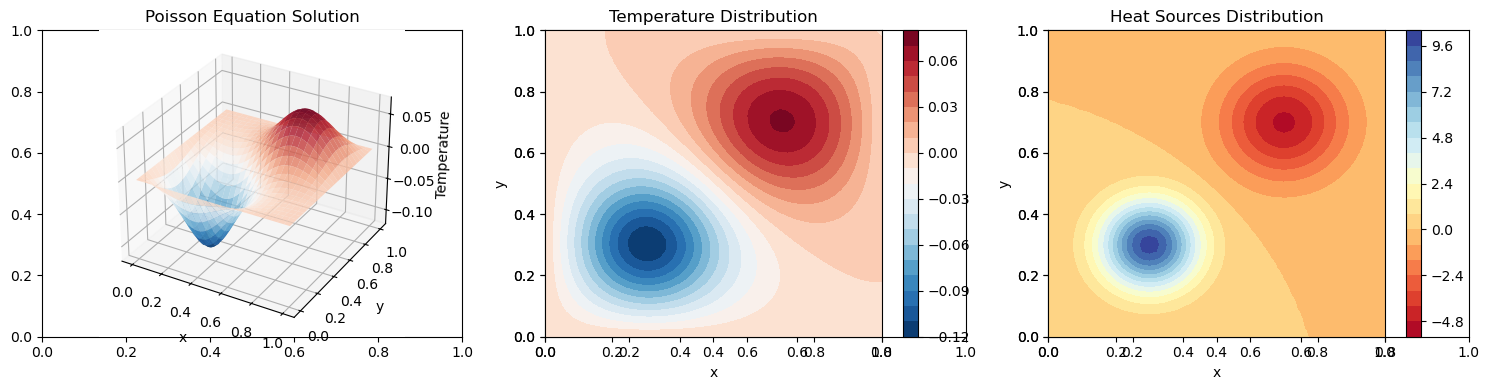

Temperature range: -0.119 to 0.072


In [9]:
# Example 1: Poisson Equation - Heat source problem
print("Example 1: Poisson Equation with Heat Sources")

# Parameters
Lx = Ly = 1.0
Nx = Ny = 50

# Heat source function: multiple Gaussian sources
def heat_sources(x, y):
    source1 = 10 * np.exp(-50 * ((x - 0.3)**2 + (y - 0.3)**2))  # Hot spot
    source2 = -5 * np.exp(-30 * ((x - 0.7)**2 + (y - 0.7)**2))  # Cold spot
    return source1 + source2

# Boundary condition function: temperature = 0 on boundaries
def boundary_temp(x, y):
    return 0.0

# Solve Poisson equation
X_poisson, Y_poisson, u_poisson = solve_poisson_2d(Lx, Ly, Nx, Ny, heat_sources, boundary_temp)

# Plot Poisson equation results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X_poisson, Y_poisson, u_poisson, cmap='RdBu_r', alpha=0.8)
ax1.set_title('Poisson Equation Solution')
ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel('Temperature')

# Contour plot
ax2 = fig.add_subplot(132)
contour1 = ax2.contourf(X_poisson, Y_poisson, u_poisson, levels=20, cmap='RdBu_r')
ax2.set_title('Temperature Distribution')
ax2.set_xlabel('x'); ax2.set_ylabel('y')
plt.colorbar(contour1, ax=ax2)

# Heat source visualization
ax3 = fig.add_subplot(133)
source_map = np.zeros_like(X_poisson)
for i in range(len(X_poisson[0])):
    for j in range(len(Y_poisson)):
        source_map[j, i] = heat_sources(X_poisson[j, i], Y_poisson[j, i])

contour2 = ax3.contourf(X_poisson, Y_poisson, source_map, levels=20, cmap='RdYlBu')
ax3.set_title('Heat Sources Distribution')
ax3.set_xlabel('x'); ax3.set_ylabel('y')
plt.colorbar(contour2, ax=ax3)

plt.tight_layout()
plt.show()

print(f"Temperature range: {np.min(u_poisson):.3f} to {np.max(u_poisson):.3f}")

In [10]:
def solve_laplace_2d_iterative(Lx, Ly, Nx, Ny, bc_func, method='gauss_seidel', max_iter=1000, tol=1e-6):
    """
    Solve 2D Laplace equation: ∇²u = 0
    using iterative methods (Jacobi or Gauss-Seidel)
    """
    # Grid setup
    dx = Lx / Nx
    dy = Ly / Ny
    x = np.linspace(0, Lx, Nx + 1)
    y = np.linspace(0, Ly, Ny + 1)
    X, Y = np.meshgrid(x, y)
    
    # Initialize solution
    u = np.zeros((Ny+1, Nx+1))
    
    # Set boundary conditions
    u[0, :] = [bc_func(x[i], y[0]) for i in range(Nx+1)]      # bottom
    u[Ny, :] = [bc_func(x[i], y[Ny]) for i in range(Nx+1)]   # top
    u[:, 0] = [bc_func(x[0], y[j]) for j in range(Ny+1)]     # left
    u[:, Nx] = [bc_func(x[Nx], y[j]) for j in range(Ny+1)]   # right
    
    # Iterative solution
    for iteration in range(max_iter):
        if method == 'jacobi':
            u_old = u.copy()
        
        max_change = 0.0
        
        for j in range(1, Ny):
            for i in range(1, Nx):
                old_value = u[j, i]
                
                if method == 'jacobi':
                    u_new = 0.25 * (u_old[j, i-1] + u_old[j, i+1] + 
                                   u_old[j-1, i] + u_old[j+1, i])
                    u[j, i] = u_new
                else:  # Gauss-Seidel - use most recent values
                    u[j, i] = 0.25 * (u[j, i-1] + u[j, i+1] + 
                                     u[j-1, i] + u[j+1, i])
                
                # Track maximum change for convergence
                change = abs(u[j, i] - old_value)
                max_change = max(max_change, change)
        
        # Check convergence based on maximum change
        if max_change < tol:
            print(f"{method.replace('_', '-').title()} converged in {iteration+1} iterations")
            print(f"Final residual: {max_change:.2e}")
            break
            
        # Print progress every 100 iterations
        if (iteration + 1) % 100 == 0:
            print(f"Iteration {iteration+1}: max change = {max_change:.2e}")
    else:
        print(f"{method.replace('_', '-').title()} did not converge in {max_iter} iterations")
        print(f"Final residual: {max_change:.2e}")
    
    return X, Y, u, iteration+1



Example 2: Laplace Equation with Iterative Methods

Comparing iterative methods:
Jacobi method:
Iteration 100: max change = 2.08e-03
Iteration 200: max change = 8.89e-04
Iteration 300: max change = 5.08e-04
Iteration 400: max change = 3.26e-04
Iteration 500: max change = 2.23e-04
Iteration 600: max change = 1.59e-04
Iteration 700: max change = 1.15e-04
Iteration 800: max change = 8.36e-05
Iteration 900: max change = 6.12e-05
Iteration 1000: max change = 4.49e-05
Iteration 1100: max change = 3.30e-05
Iteration 1200: max change = 2.42e-05
Iteration 1300: max change = 1.78e-05
Iteration 1400: max change = 1.31e-05
Jacobi converged in 1487 iterations
Final residual: 9.98e-06

Gauss-Seidel method:
Iteration 100: max change = 1.90e-03
Iteration 200: max change = 6.92e-04
Iteration 300: max change = 3.36e-04
Iteration 400: max change = 1.77e-04
Iteration 500: max change = 9.55e-05
Iteration 300: max change = 3.36e-04
Iteration 400: max change = 1.77e-04
Iteration 500: max change = 9.55e-05
I

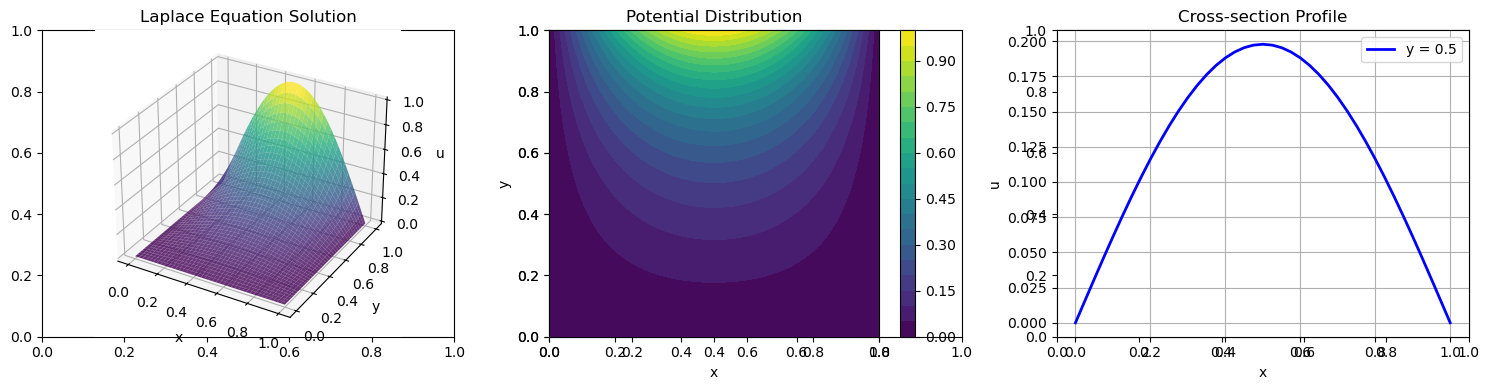

Converged in 866 iterations
Solution range: 0.000 to 1.000


In [11]:
# Example 2: Laplace Equation - Boundary value problem
print("\nExample 2: Laplace Equation with Iterative Methods")

# Parameters for Laplace equation
Lx = Ly = 1.0
Nx = Ny = 40

# Boundary condition function for Laplace equation
def boundary_func_laplace(x, y):
    if abs(y - 1.0) < 1e-10:  # top boundary (Ly = 1.0)
        return np.sin(np.pi * x)
    else:
        return 0.0

# Compare Jacobi vs Gauss-Seidel methods
print("\nComparing iterative methods:")

# Solve using Jacobi iteration
print("Jacobi method:")
X_jacobi, Y_jacobi, u_jacobi, iter_jacobi = solve_laplace_2d_iterative(
    Lx, Ly, Nx, Ny, boundary_func_laplace, method='jacobi', max_iter=2000, tol=1e-5)

print("\nGauss-Seidel method:")
# Solve using Gauss-Seidel iteration
X_iter, Y_iter, u_iter, iterations = solve_laplace_2d_iterative(
    Lx, Ly, Nx, Ny, boundary_func_laplace, method='gauss_seidel', max_iter=1000, tol=1e-5)

# Plot Laplace equation results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X_iter, Y_iter, u_iter, cmap='viridis', alpha=0.8)
ax1.set_title('Laplace Equation Solution')
ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel('u')

# Contour plot
ax2 = fig.add_subplot(132)
contour1 = ax2.contourf(X_iter, Y_iter, u_iter, levels=20, cmap='viridis')
ax2.set_title('Potential Distribution')
ax2.set_xlabel('x'); ax2.set_ylabel('y')
plt.colorbar(contour1, ax=ax2)

# Cross-section at y = 0.5
ax3 = fig.add_subplot(133)
mid_idx = Ny // 2
ax3.plot(X_iter[mid_idx, :], u_iter[mid_idx, :], 'b-', linewidth=2, label='y = 0.5')
ax3.set_title('Cross-section Profile')
ax3.set_xlabel('x')
ax3.set_ylabel('u')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

print(f"Converged in {iterations} iterations")
print(f"Solution range: {np.min(u_iter):.3f} to {np.max(u_iter):.3f}")